<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/06_cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Fashion MNIST

In [13]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [14]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [15]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
K = len(set(y_train))

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5203 - accuracy: 0.8073 - val_loss: 0.3973 - val_accuracy: 0.8493
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3643 - accuracy: 0.8635 - val_loss: 0.3539 - val_accuracy: 0.8669
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.8831 - val_loss: 0.3236 - val_accuracy: 0.8809
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2777 - accuracy: 0.8947 - val_loss: 0.3117 - val_accuracy: 0.8845
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2523 - accuracy: 0.9047 - val_loss: 0.2958 - val_accuracy: 0.8862
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2313 - accuracy: 0.9130 - val_loss: 0.2894 - val_accuracy: 0.8975
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2139 - accuracy: 0.9188 - val_loss: 0.2953 - val_accuracy:

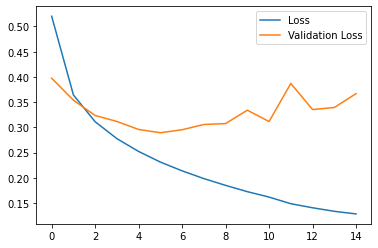

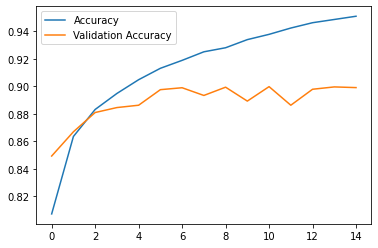

313/313 [==============================] - 0s 979us/step - loss: 0.3669 - accuracy: 0.8990
Accuracy: 0.8989999890327454


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[862   0  20  16   3   2  90   0   7   0]
 [  0 976   0  17   2   0   4   0   1   0]
 [ 24   1 838   9  68   0  60   0   0   0]
 [ 20   2  27 883  37   0  30   0   1   0]
 [  1   0  50  16 876   0  57   0   0   0]
 [  1   0   0   0   0 985   0   7   0   7]
 [119   1  60  19 112   0 681   0   8   0]
 [  0   0   0   0   0  18   0 964   1  17]
 [  3   1   4   1   5   4   6   4 971   1]
 [  1   0   0   1   0   9   0  35   0 954]]


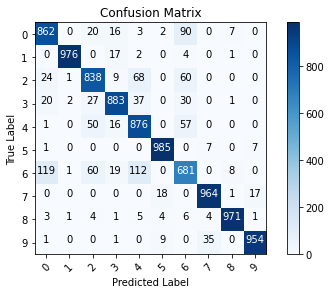

In [17]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

## Display a random misclassified image

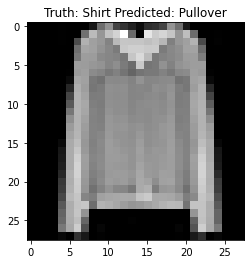

In [20]:
labels = [
    'T-shirt/top', 
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]
misclassified_idx = np.where(p_test != y_test)[0]
i =  np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')
plt.show()